# Import

In [1]:
from glob import glob

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import linalg as LA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.mixture import GaussianMixture
from tqdm import tqdm

In [5]:
model_num = 40

In [6]:
dfs = [pd.read_csv(f"./data/gmm_score{count}.csv", index_col= 0) for count in range(model_num)]

In [14]:
AIC_df = pd.concat([df.T["AIC"] for df in dfs], axis=1)
AIC_df.columns = range(model_num)

In [30]:
dfs[0]

,2,3,4,5,6,7,8,9,10,20,40,80,160,320,640
MI,0.191662,0.308586,0.428663,0.192797,0.425272,0.420310,0.417194,0.415491,0.397215,0.177556,8.058427e-03,1.705918e-03,5.856069e-03,4.154992e-03,4.117998e-03
AIC,397806.301054,546698.692857,606913.899686,653209.653003,684346.297944,680426.300988,653871.745288,619525.218766,565748.055842,-469294.943371,-4.266246e+06,-1.509276e+07,-4.337908e+07,-1.134216e+08,-2.804532e+08
BIC,397951.729759,546882.902550,607136.890367,653471.424672,684646.850602,680765.634634,654249.859922,619942.114388,566203.732452,-468451.456880,-4.264627e+06,-1.508959e+07,-4.337281e+07,-1.134091e+08,-2.804283e+08
LogLikelyhood,-1.657401,-2.277753,-2.528616,-2.721482,-2.851185,-2.834818,-2.724141,-2.580997,-2.356892,1.956121,1.777742e+01,6.288922e+01,1.807516e+02,4.726008e+02,1.168576e+03


<AxesSubplot: >

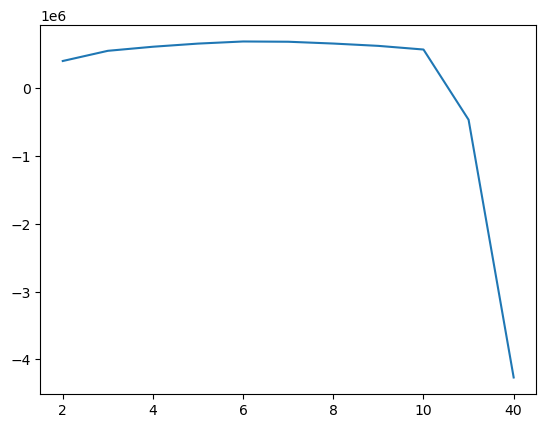

In [39]:
AIC_df.T.describe().T["mean"].iloc[:11].plot()

In [29]:
AIC_df.T.describe().idxmin(axis=1)

count      2
mean     640
std        7
min      640
25%      640
50%      640
75%      640
max      640
dtype: object

In [26]:
MI_df = pd.concat([df.T["MI"] for df in dfs], axis=1)
MI_df.columns = range(model_num)

In [27]:
MI_df.T.describe().idxmax(axis=1)

count     2
mean      4
std      20
min       4
25%       4
50%       4
75%       4
max       4
dtype: object